In [1]:
import torch
import torchvision as tv
import numpy as np

## Load the weights

In [2]:
z = np.load('style.npz')
z.keys()

['conv8.bias',
 'conv8.weight',
 'conv7.bias',
 'conv7.weight',
 'conv6.bias',
 'conv6.weight',
 'conv5.bias',
 'conv5.weight',
 'conv4.bias',
 'conv4.weight',
 'conv3.bias',
 'conv3.weight',
 'conv2.bias',
 'conv2.weight',
 'conv1.bias',
 'conv1.weight']

In [3]:
w_conv1 = z['conv1.weight'].transpose(2, 3, 1, 0)
b_conv1 = z['conv1.bias']
w_conv2 = z['conv2.weight'].transpose(2, 3, 1, 0)
b_conv2 = z['conv2.bias']
w_conv3 = z['conv3.weight'].transpose(2, 3, 1, 0)
b_conv3 = z['conv3.bias']
w_conv4 = z['conv4.weight'].transpose(2, 3, 1, 0)
b_conv4 = z['conv4.bias']
w_conv5 = z['conv5.weight'].transpose(2, 3, 1, 0)
b_conv5 = z['conv5.bias']
w_conv6 = z['conv6.weight'].transpose(2, 3, 1, 0)
b_conv6 = z['conv6.bias']
w_conv7 = z['conv7.weight'].transpose(2, 3, 1, 0)
b_conv7 = z['conv7.bias']
w_conv8 = z['conv8.weight'].transpose(2, 3, 1, 0)
b_conv8 = z['conv8.bias']

## Define the graph

In [4]:
from conv import Conv2D

In [5]:
conv1 = Conv2D([1, 128, 128, 3], 32, method='SAME')
conv1.set_w_and_b(w_conv1, b_conv1)

conv2 = Conv2D([1, 128, 128, 32], 64, ksize=1, method='SAME')
conv2.set_w_and_b(w_conv2, b_conv2)

conv3 = Conv2D([1, 128, 128, 64], 32, ksize=1, method='SAME')
conv3.set_w_and_b(w_conv3, b_conv3)

conv4 = Conv2D([1, 128, 128, 32], 3, method='SAME')
conv4.set_w_and_b(w_conv4, b_conv4)

conv5 = Conv2D([1, 128, 128, 3], 32, method='SAME')
conv5.set_w_and_b(w_conv5, b_conv5)

conv6 = Conv2D([1, 128, 128, 32], 64, ksize=1, method='SAME')
conv6.set_w_and_b(w_conv6, b_conv6)

conv7 = Conv2D([1, 128, 128, 64], 32, ksize=1, method='SAME')
conv7.set_w_and_b(w_conv7, b_conv7)

conv8 = Conv2D([1, 128, 128, 32], 3, method='SAME')
conv8.set_w_and_b(w_conv8, b_conv8)

## Read in the image and apply the net

In [6]:
from PIL import Image
im = np.asarray(Image.open('before.jpg').resize((128, 128)), dtype=np.float16)
im = im[np.newaxis, :, :, :]

In [7]:
conv1_out = conv1.forward(im)
relu1 = np.maximum(conv1_out, 0)

conv2_out = conv2.forward(relu1)
relu2 = np.maximum(conv2_out, 0)

conv3_out = conv3.forward(relu2)
relu3 = np.maximum(conv3_out, 0)

conv4_out = conv4.forward(relu3)
relu4 = np.maximum(conv4_out, 0) + im

conv5_out = conv5.forward(relu4)
relu5 = np.maximum(conv5_out, 0)

conv6_out = conv6.forward(relu5)
relu6 = np.maximum(conv6_out, 0)

conv7_out = conv7.forward(relu6)
relu7 = np.maximum(conv7_out, 0)

conv8_out = conv8.forward(relu7) + im

In [8]:
ou = conv8_out.reshape((128, 128, 3))
ou = np.array(ou, dtype=np.uint8)
ou_im = Image.fromarray(ou)
ou_im.save('after.jpg')

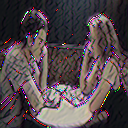

In [9]:
ou_im

## Calc the time

In [10]:
%%timeit
conv1_out = conv1.forward(im)
relu1 = np.maximum(conv1_out, 0)

conv2_out = conv2.forward(relu1)
relu2 = np.maximum(conv2_out, 0)

conv3_out = conv3.forward(relu2)
relu3 = np.maximum(conv3_out, 0)

conv4_out = conv4.forward(relu3)
relu4 = np.maximum(conv4_out, 0) + im

conv5_out = conv5.forward(relu4)
relu5 = np.maximum(conv5_out, 0)

conv6_out = conv6.forward(relu5)
relu6 = np.maximum(conv6_out, 0)

conv7_out = conv7.forward(relu6)
relu7 = np.maximum(conv7_out, 0)

conv8_out = conv8.forward(relu7) + im

628 ms ± 7.52 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
